In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import difflib
%matplotlib inline

In [2]:
def swc_to_dataframe( file_name ) :
    col_names = ['id', 'type', 'x', 'y', 'z', 'radius', 'parent', 'seg_id', 'level', 'mode', 'timestamp', 'TFresindex']
    df = pd.read_csv( file_name, sep=r"\s+", comment = "#", names = col_names, index_col = 'id')
    return df

In [3]:
def filter_swc( df, type ) :
    dd = df[df['type']==type]
    return dd

In [4]:
def file_diff( file1, file2 ) :
    
    with open(file1) as f1:
        f1_text = f1.read()
    with open(file2) as f2:
        f2_text = f2.read()
        
    # Find and print the diff:
    count = 0;
    for line in difflib.unified_diff(f1_text, f2_text, fromfile=file1, tofile=file2, lineterm=''):
        
        print(line)
        count += 1
        
        if count > 15 :
            break
    

In [5]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

In [76]:
#model_directory = "/allen/programs/celltypes/workgroups/mousecelltypes/_UPENN_fMOST"
model_directory = "C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST"

# Registered SWC files directly from HUST vs from the code
reference_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","TransformedByHUST","182709_RegisteredByHUST","182709_RegisteredByHUST")
input_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Sandbox","output_from_processed_input")

# SWC files directly sent to HUST
#reference_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Original","182709_ByHUST_original_sent")
#input_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Original","182709_newCells")


In [96]:
#for rfile in glob.glob(os.path.join(reference_directory, "*.swc")):
#for rfile in [os.path.join(reference_directory,'182709_1392-X9267-Y12144_reg.swc')] :
#for rfile in [os.path.join(reference_directory,'182709_1565-X10730-Y13868_reg.swc')] :
#for rfile in [os.path.join(reference_directory,'182709_2078-X10276-Y14982_reg.swc')] :    
for rfile in [os.path.join(reference_directory,'182709_8205-X11007-Y9343_reg.swc')] :
    
    print(rfile)
    
    bb = os.path.basename( rfile )
    ifile = os.path.join(input_directory, bb)
    
    print(ifile)
    
    file_diff(rfile,ifile)
    
    rdf = swc_to_dataframe( rfile )
    idf = swc_to_dataframe( ifile )
    

C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\TransformedByHUST\182709_RegisteredByHUST\182709_RegisteredByHUST\182709_8205-X11007-Y9343_reg.swc
C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\Sandbox\output_from_processed_input\182709_8205-X11007-Y9343_reg.swc
--- C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\TransformedByHUST\182709_RegisteredByHUST\182709_RegisteredByHUST\182709_8205-X11007-Y9343_reg.swc
+++ C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\Sandbox\output_from_processed_input\182709_8205-X11007-Y9343_reg.swc
@@ -21,40 +21,40 @@
 0
 	
 5
-9
-0
-9
-.
-3
-6
-8
-9
-9
-6


In [97]:
rdf

,type,x,y,z,radius,parent,seg_id,level,mode,timestamp,TFresindex
id,,,,,,,,,,,
63820.0,1.0,5909.368996,3279.805753,10151.893331,0.000,-1.0,NaN,NaN,NaN,NaN,NaN
64048.0,3.0,5884.840228,3267.846244,10139.610038,1.000,63963.0,NaN,NaN,NaN,NaN,NaN
64047.0,3.0,5883.325102,3267.520424,10139.355158,1.000,64048.0,NaN,NaN,NaN,NaN,NaN
64046.0,3.0,5881.336257,3267.255784,10137.737010,1.000,64047.0,NaN,NaN,NaN,NaN,NaN
64045.0,3.0,5876.395949,3265.663403,10137.349397,1.000,64046.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
65119.0,2.0,4961.730308,7088.772500,6945.518249,0.618,65118.0,NaN,NaN,NaN,NaN,NaN
65120.0,2.0,4962.022954,7089.077261,6945.733963,0.618,65119.0,NaN,NaN,NaN,NaN,NaN
65121.0,2.0,4962.155957,7089.246400,6946.050673,0.618,65120.0,NaN,NaN,NaN,NaN,NaN


In [98]:
idf

,type,x,y,z,radius,parent,seg_id,level,mode,timestamp,TFresindex
id,,,,,,,,,,,
63820.0,1.0,5871.179033,3362.478050,10112.231421,0.000,-1.0,NaN,NaN,NaN,NaN,NaN
64048.0,3.0,5846.659234,3349.945145,10097.776938,1.000,63963.0,NaN,NaN,NaN,NaN,NaN
64047.0,3.0,5845.167271,3349.617201,10097.444794,1.000,64048.0,NaN,NaN,NaN,NaN,NaN
64046.0,3.0,5843.167247,3349.292645,10095.586309,1.000,64047.0,NaN,NaN,NaN,NaN,NaN
64045.0,3.0,5838.320276,3347.699750,10094.987388,1.000,64046.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
65119.0,2.0,5040.678362,7155.011662,6913.875024,0.618,65118.0,NaN,NaN,NaN,NaN,NaN
65120.0,2.0,5040.932625,7155.287576,6914.106095,0.618,65119.0,NaN,NaN,NaN,NaN,NaN
65121.0,2.0,5041.033249,7155.423755,6914.440869,0.618,65120.0,NaN,NaN,NaN,NaN,NaN


(727.7150102566975, 0.8684845513892265)

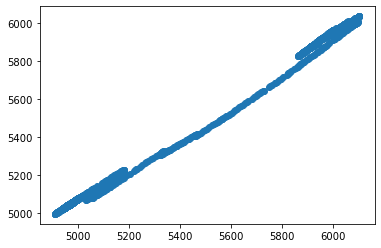

In [99]:
plt.plot(rdf['x'],idf['x'],'o')
estimate_coef(rdf['x'],idf['x'])

(101.18475803798447, 0.9935430704037018)

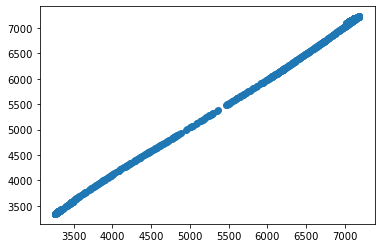

In [100]:
plt.plot(rdf['y'],idf['y'],'o')
estimate_coef(rdf['y'],idf['y'])

(-12.71517060565202, 0.9804808718740194)

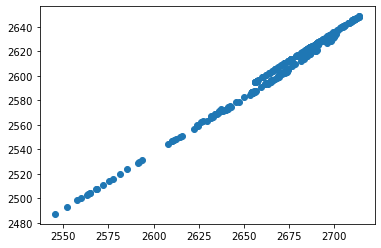

In [95]:
plt.plot(rdf['z'],idf['z'],'o')
estimate_coef(rdf['z'],idf['z'])